# Introduction to Data Science - Homework 3
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, January 31, 11:59pm.

In this homework you will read in and analyze a games dataset. First we'll do some basic analysis with vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable). 


## Your Data
Fill out the following information: 

*First Name:*  Andrea 

*Last Name:*   Stofko

*E-mail:*      andrea.stofko@utah.edu

*UID:*         u6040357


In [1]:
# imports
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Part 1: Analyzing Data The Basic Way

In this part we'll do some manual analysis of an Iphone Strategy Games dataset.

### Task 1.1: Read in the data

Parse the file [games.csv](games.csv) using the [csv library](https://docs.python.org/3/library/csv.html). Lecture 6 and might be a good inspiration for this. 

We recommend that you store the header in a separate array. Make sure that at least the "Rating" and the "Number of Ratings" columns are cast to the appropriate data types for doing calculations with them. 

Print the header, the number of rows and columns, and Row 50 of the table.

##### 1.1 Read in the data

In [19]:
# initialize the top-level array
games = []
header = []

# open the file and append rows as arrays to the data_values
with open('games.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='"')
    # the row here is an array
    for row in filereader:
        print("Row: " + str(row))
        games.append(row)

# Store the header in a separate array
header = games.pop(0)

print(games[0:10])

Row: ['App Name', 'App ID', 'Price', 'Rating', 'Number of Ratings', 'Developer', 'Size', 'Minimum OS Version', 'Content Rating', 'Genre', 'Year']
Row: ['Boom Beach: War Strategy Game', '672150402', 'Free', '4.70967', '287246', 'Supercell Oy', '604057600', '12', '9+', 'Action', '2014']
Row: ['State.io - Conquer the World', '1559032748', 'Free', '4.54875', '198271', 'AI GAMES FZ LLC', '274869248', '13', '12+', 'Strategy', '2021']
Row: ['Two Spies', '1466304408', 'Free', '4.74081', '11235', 'Royal Pixel Service, Ltd.', '92142592', '13', '9+', 'Board', '2019']
Row: ['Forge of Empires: Build a City', '711455226', 'Free', '4.60095', '164179', 'InnoGames GmbH', '388532224', '12', '9+', 'Entertainment', '2014']
Row: ['Clash of Clans', '529479190', 'Free', '4.75467', '2571858', 'Supercell Oy', '420755456', '12', '9+', 'Action', '2012']
Row: ['Stick War: Legacy', '1001780528', 'Free', '4.80455', '61684', '1004319 Alberta Ltd', '260213760', '13', '12+', 'Adventure', '2016']
Row: ['T3 Arena', '160

##### 1.1 Make sure that at least the "Rating" and the "Number of Ratings" columns are cast to the appropriate data types for doing calculations with them.

In [3]:
#change variable types so that 'Ratings' is a float and 'Number of Ratings' is a float
for row in games:
    row[3] = float(row[3]) #Ratings
    row[4] = int(row[4]) #Number of Ratings

print(games[0]) #check (looks good)

['Boom Beach: War Strategy Game', '672150402', 'Free', 4.70967, 287246, 'Supercell Oy', '604057600', '12', '9+', 'Action', '2014']


##### 1.1 Print the header, the number of rows and columns, and Row 50 of the table.

In [433]:
# print header
print("The headers are",header)

#print number of rows and columns
print("There are", len(games),"rows") #check number of rows
print("There are",len(games[0]),"columns")

#print row 50
print(games[49])

The headers are ['App Name', 'App ID', 'Price', 'Rating', 'Number of Ratings', 'Developer', 'Size', 'Minimum OS Version', 'Content Rating', 'Genre', 'Year']
There are 15668 rows
There are 11 columns
['World of Tanks Blitz™', '859204347', 'Free', '4.61428', '127265', 'WARGAMING Group Limited', '3992943616', '12', '12+', 'Strategy', '2014']


### Task 1.2:  Calculate game stats

In this task, you will calculate some statistics about games. We suggest you implement your solutions for Tasks 1.2.1-1.2.3 in one code cell – you should be able to calculate this in a single iteration over the dataset.

#### Task 1.2.1 Calcualte average ratings
Compute the average rating for all games and print the output and total. Your output could look like this:
    
    Average rating: xxx.xxxx, Total games: xx

#### Task 1.2.2: Calculate average rating for major games

Compute the average rating for the games that have more than 250 ratings in your loaded dataset and print the output. (We'll call these games with more than 250 ratings major games from now on).

Your output could look like this:
    
    Average rating for major games: xxx.xxxx, Total major games: xx

#### Task 1.2.3: Find the highest and the lowest rated major games

Determine which major game has the highest rating and which has the lowest rating.

Your output could look like this:
    
    Highest rating: xxx.xxxx, Title: GAME TITLE
    Lowest rating: xxx.xxxx, Title: GAME TITLE
 
#### Task 1.2.4: Interpret the data
 * What's the rating relationship of major games to all games?
 * Are major games typically better than the average of all games?

In [61]:
len(games)

15668

In [29]:
print(header)

['App Name', 'App ID', 'Price', 'Rating', 'Number of Ratings', 'Developer', 'Size', 'Minimum OS Version', 'Content Rating', 'Genre', 'Year']


##### 1.2.1-3 Calculate average ratings, average ratings for major games, and find highest and lowest rated major game

In [4]:
#start by computing average for all games and print total number of games

#1.2.1 - Calculate avg ratings
def ratings(games):
    length = len(games) #find total number of games
    avg = (sum([row[3] for row in games]))/length #find average by getting sum of all ratings and dividing by length
    print (f"Average rating: {avg}, Total games: {length}") #return average and length

    #1.2.2 - Calculate the avg rating for major games
    major_games = [] #create major games category
    for row in games:
        if row[4] > 250: #row 5 = number of ratings (return only those with more than 250 ratings)
            major_games.append(row) #creates a subset of df with all columns for 'major games'
    len_mg = len(major_games) #find length of major games array
    avgmg = sum([row[3] for row in major_games])/len_mg #find average using same method as above
    print(f"The average rating for major games is {avgmg}") #return average rating for major games

    #1.2.3 - Which major had the highest rating and which had lowest?
    sorted_values = sorted(major_games, key = lambda row:row[3], reverse = True) #use lambda function and sort based on ratings (ascending)
    lowest_major = sorted_values[-1][0] #take lowest (bottom value after being sorted)
    highest_major = sorted_values[0][0] #take highest
    lowest_rating = sorted_values [-1][3] #find rating
    highest_rating = sorted_values[0][3]
    return(f"The highest rated major games is {highest_major} and its rating is {highest_rating}\nThe lowest rated major game is {lowest_major} and the rating is {lowest_rating}")

In [5]:
print(ratings(games))

Average rating: 2.8902173110799083, Total games: 15668
The average rating for major games is 4.520254574297189
The highest rated major games is Crazy Rolling Hero and its rating is 4.99162
The lowest rated major game is Three Kingdoms Killing and the rating is 1.58894


**Your Interpretation**: Games with more ratings are typically rated higher on average. The average rating for all the 15,668 games
was 2.9, while the average rating for games that had over 250 ratings was 4.5.

## Part 2: Pandas

In this part we will use the [Pandas library](http://pandas.pydata.org/pandas-docs/stable) for our analysis.

### Task 2.1: Loading data

Read in the data again. This time you should create a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Print the head of the dataset. 
 * How many data rows did you load? How many columns?
 * Of which data types are the columns? 
 * Do you have to do manual data type conversions?

In [6]:
#load in dataframe, this time using Pandas
gamespd = pd.read_csv('games.csv')
gamespd.head()

,App Name,App ID,Price,Rating,Number of Ratings,Developer,Size,Minimum OS Version,Content Rating,Genre,Year
0,Boom Beach: War Strategy Game,672150402,Free,4.70967,287246,Supercell Oy,604057600,12,9+,Action,2014
1,State.io - Conquer the World,1559032748,Free,4.54875,198271,AI GAMES FZ LLC,274869248,13,12+,Strategy,2021
2,Two Spies,1466304408,Free,4.74081,11235,"Royal Pixel Service, Ltd.",92142592,13,9+,Board,2019
3,Forge of Empires: Build a City,711455226,Free,4.60095,164179,InnoGames GmbH,388532224,12,9+,Entertainment,2014
4,Clash of Clans,529479190,Free,4.75467,2571858,Supercell Oy,420755456,12,9+,Action,2012


***2.1 How many data rows? How many columns?***

In [436]:
#Use .shape to find number of rows and columns
print(gamespd.shape)

(15668, 11)


There are 15,668 rows and 11 columns.

***2.1 Of which data types are the columns?***

In [434]:
#Use .dtypes to find datatypes 
print(gamespd.dtypes)

App Name               object
App ID                  int64
Price                  object
Rating                float64
Number of Ratings       int64
Developer              object
Size                    int64
Minimum OS Version     object
Content Rating         object
Genre                  object
Year                    int64
dtype: object


**Your Interpretation**: 
Using the built-in shape function, we can see that the games dataframe has 15,668 rows and 11 columns. Unlike when we loaded using the built in python 'open' function, the datatypes here are as expected. 'Rating' is a float and 'Number of Ratings' is an int. In this case, I will not be doing any manual data conversions.

### Task 2.2: Calculate the average rating

Compute the average rating for all games and print the output and total. Your output could look like this:
    
    Average rating: xxx.xxxx, Total games: xx

##### Quick check for duplicates before calculating averages, etc.

In [185]:
#checking for duplicate rows (which I should have checked in question 1)
duplicates = gamespd.duplicated()
print(gamespd[duplicates])

Empty DataFrame
Columns: [App Name, App ID, Price, Rating, Number of Ratings, Developer, Size, Minimum OS Version, Content Rating, Genre, Year]
Index: []


In [190]:
#looks good, but double check App IDs are unique
gamespd["App ID"].is_unique

True

##### Find average rating and total number of games:

In [437]:
#use .mean to find mean of "Rating" column
print("The average rating is:",gamespd["Rating"].mean(),", Total games:", gamespd["App Name"].count())

The average rating is: 2.8902173110799083 , Total games: 15668


### Task 2.3: Compare the runtime

We want to measure how long it takes to calculate the average using Pandas versus using a for loop (you can copy the relevant parts from Task 1). This is a fast calculation, so running once is not enough. Instead, run both calcuations 1000 times (in a loop) and measure the time for the entire loop.

To measure, use [time.process_time()](https://docs.python.org/3/library/time.html#time.process_time) to collect timestamps before and after the loop. The total time is the difference between those timestamps.

Print your results in a human readable way and add a metric to the output. Calculate the factor of the difference and print it. Note that the exact times and the factors will vary when you re-run this and especially between machines. 

E.g.:  
 Time the Part 1 way: xxx.xxx s\
 Time using Pandas: xxx.xxx s\
 Difference factor: xxx
    
Interpret the results. Is this difference substantial?     

In [7]:
#import packages
import time
from time import process_time

#establish number of iterations:
x = 1000

#calculate time for the first function in part 1:
p1Start = process_time() #start timer
for i in range(x):  #keep timer going for 1000 loops
    length = len(games)  
    avg = (sum([row[3] for row in games]))/length #calculate avg using part 1 func
    
p1Stop = process_time() #stop timer
p1Total = p1Stop - p1Start #calcualte total time for Part 1 code

#move on to Pandas version:
pdStart = process_time() #start timer
for i in range(x):
    gamespdAvg = gamespd["Rating"].mean()
    
pdStop = process_time() #stop timer
pdTotal = pdStop - pdStart #calcualte total run time

difference = round(p1Total/pdTotal,2) #find difference factor between the two programs

#print out the results 
print(f"Time for Part 1 way: {p1Total} seconds\nTime using Pandas: {pdTotal} seconds\nDifference factor: {difference}")

Time for Part 1 way: 0.186523 seconds
Time using Pandas: 0.012666000000000066 seconds
Difference factor: 14.73


**Your Interpretation**: The result above demonstrates the efficiency of using Pandas versus base Python when working with dataframes. When calculating the mean as an example, we can see that Pandas is faster by a factor of almost 15.

### Task 2.4: Filter out Rows

The whole games dataset has about 15,000 games. Use pandas to filter your dataframe to contain only the major games. Then print the total.

E.g.:
    xxx.xxx games have more than 250 ratings.

In [217]:
# filter using loc 
major_gamespd = gamespd.loc[gamespd["Number of Ratings"] > 250]
major_gamespd.head()

,App Name,App ID,Price,Rating,Number of Ratings,Developer,Size,Minimum OS Version,Content Rating,Genre,Year
0,Boom Beach: War Strategy Game,672150402,Free,4.70967,287246,Supercell Oy,604057600,12,9+,Action,2014
1,State.io - Conquer the World,1559032748,Free,4.54875,198271,AI GAMES FZ LLC,274869248,13,12+,Strategy,2021
2,Two Spies,1466304408,Free,4.74081,11235,"Royal Pixel Service, Ltd.",92142592,13,9+,Board,2019
3,Forge of Empires: Build a City,711455226,Free,4.60095,164179,InnoGames GmbH,388532224,12,9+,Entertainment,2014
4,Clash of Clans,529479190,Free,4.75467,2571858,Supercell Oy,420755456,12,9+,Action,2012


In [219]:
#inspect new df
print(major_gamespd.shape)

(2490, 11)


The new major games dataframe has 2,490 games.

### Task 2.5: Calculate the average rating for major games

Compute the average rating for the major games.
Your output could look like this:
    
    Average rating of major games: xxx.xxxx

In [221]:
#find average of major games
avg_mg = major_gamespd["Rating"].mean()
print("The average rating for major games is",avg_mg)

The average rating for major games is 4.520254574297189


### Task 2.6: Find the highest and lowest rated major games

Find the highest rated minor game and the lowest major game in the dataframe. Hint: [idxmax()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html) and [idxmin()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmin.html) could be helpful, or you could sort by rating and retrieve the first element.

Print the title and the rating.

Your output could look like this:
    
    Highest rated game: TITLE, rating: x.x
    Lowest rated game: TITLE, rating: x.x


In [248]:
#Find the highest and lowest rated major games
idxmax = major_gamespd["Rating"].idxmax()
idxmin = major_gamespd["Rating"].idxmin()

print(f"The highest rated game is {major_gamespd.loc[idxmax,"App Name"]}, rating: {major_gamespd.loc[idxmax,"Rating"]}")
print(f"The lowest rated game is {major_gamespd.loc[idxmin,"App Name"]}, rating: {major_gamespd.loc[idxmin,"Rating"]}")

The highest rated game is Crazy Rolling Hero, rating: 4.99162
The lowest rated game is Three Kingdoms Killing, rating: 1.58894


### Task 2.7: Create genre subset frames

From the major games you filtered out in a previous task, find out 
 * How many are Entertainment.
 * How many are Puzzle.
 * How many are both Entertainment and Puzzle.
 
Create new dataframes for each of these subsets.

Hint: you can combine broadcasting statements with a boolean and using the `&` operator.

Print the results, e.g.:  

    xxx.xxx major games are Entertainment.
    xxx.xxx major games are Puzzle.
    xxx.xxx major games are both, Entertainment and Puzzle.

In [251]:
#head data frame again to inspect headers
major_gamespd.head()
#ok, we'll need to look at genre

,App Name,App ID,Price,Rating,Number of Ratings,Developer,Size,Minimum OS Version,Content Rating,Genre,Year
0,Boom Beach: War Strategy Game,672150402,Free,4.70967,287246,Supercell Oy,604057600,12,9+,Action,2014
1,State.io - Conquer the World,1559032748,Free,4.54875,198271,AI GAMES FZ LLC,274869248,13,12+,Strategy,2021
2,Two Spies,1466304408,Free,4.74081,11235,"Royal Pixel Service, Ltd.",92142592,13,9+,Board,2019
3,Forge of Empires: Build a City,711455226,Free,4.60095,164179,InnoGames GmbH,388532224,12,9+,Entertainment,2014
4,Clash of Clans,529479190,Free,4.75467,2571858,Supercell Oy,420755456,12,9+,Action,2012


##### Create subset for Entertainment

In [254]:
#subset for entertainment
entertainment = major_gamespd.loc[major_gamespd["Genre"] == "Entertainment"]
entertainment.head()

,App Name,App ID,Price,Rating,Number of Ratings,Developer,Size,Minimum OS Version,Content Rating,Genre,Year
3,Forge of Empires: Build a City,711455226,Free,4.60095,164179,InnoGames GmbH,388532224,12,9+,Entertainment,2014
16,Grand War: Rome Strategy Games,1593989305,Free,4.83031,3029,"HangZhouCaiLingTechnology.Co., Limited",1059197952,12,12+,Entertainment,2021
22,Last Empire – War Z: Strategy,1040083067,Free,4.26060,3726,Interesting Game Network Limited,585486336,12,12+,Entertainment,2015
24,WW2: Strategy Games War Games,1486726122,Free,4.39689,1416,哲宇 吴,349575168,9,12+,Entertainment,2019
26,Cooking Fever: Restaurant Game,714796093,Free,4.46584,266749,Nordcurrent UAB,261784576,13,4+,Entertainment,2014


In [255]:
#check dimensions
entertainment.shape

(326, 11)

##### Create subset for Puzzle

In [256]:
puzzle = major_gamespd.loc[major_gamespd["Genre"]== "Puzzle"]
puzzle.head()

,App Name,App ID,Price,Rating,Number of Ratings,Developer,Size,Minimum OS Version,Content Rating,Genre,Year
40,Woodoku - Wood Block Puzzles,1496354836,Free,4.70408,615991,Tripledot Studios Limited,248501248,13,12+,Puzzle,2020
46,Tetris®,1491074310,Free,4.54863,414805,"Playstudios, Inc.",317107200,13,4+,Puzzle,2020
229,Playdoku: Block Puzzle Game,6443701534,Free,4.41866,97140,Burny Games LTD,321691648,13,17+,Puzzle,2022
313,Shooting Tower: Defense Game,1605594063,Free,4.68015,15404,Freeplay LLC,315475968,12.5,9+,Puzzle,2022
314,Bubble Explode - pop puzzle,376098160,Free,4.59879,18135,Spooky House Studios UG (haftungsbeschraenkt),176892928,13,4+,Puzzle,2010


In [258]:
#check dimensions
puzzle.shape

(90, 11)

##### Create subset where genre = entertainment and puzzle

In [259]:
ep = major_gamespd.loc[(major_gamespd["Genre"] == "Puzzle") & (major_gamespd["Genre"] == "Entertainment")]
ep.head()

,App Name,App ID,Price,Rating,Number of Ratings,Developer,Size,Minimum OS Version,Content Rating,Genre,Year


****Results**** - Genres are mutually exclusive. This is shown in the results below.

In [262]:
print(f"{len(entertainment)} major games are Entertainment.\n{len(puzzle)} major games are Puzzle.\n{len(ep)} are Entertainment and Puzzle.")

326 major games are Entertainment.
90 major games are Puzzle.
0 are Entertainment and Puzzle.


### Task 2.8: Compare ratings of different categories

Now we want to compare the ratings for Entertainment and Puzzle among the major games.

Compute the average rating, maximum rating, minimum rating, standard deviation, and the median for each category. Hint: there is a function that does all of this in one line. 

What do these numbers tell us? Provide an interpretation.

##### Using the decsribe() function to get summary statistics for each of the numeric columns.

In [267]:
#Find descriptive statistics for the Entertainment and Puzzle subsets
entertainment.describe()

,App ID,Rating,Number of Ratings,Size,Year
count,3.260000e+02,326.000000,326.000000,3.260000e+02,326.000000
mean,1.543367e+09,4.498537,15193.739264,3.349242e+08,2017.291411
std,1.442269e+09,0.340949,58154.664965,4.497874e+08,3.509686
min,2.924213e+08,2.482870,251.000000,6.004736e+06,2008.000000
25%,9.771468e+08,4.403702,541.250000,1.188836e+08,2015.000000
50%,1.245505e+09,4.586470,1571.500000,2.129572e+08,2017.000000
75%,1.489724e+09,4.701925,5837.500000,3.707633e+08,2020.000000
max,6.727009e+09,4.938460,780194.000000,3.978186e+09,2024.000000


In [268]:
#descriptive stats for Puzzle games
puzzle.describe()

,App ID,Rating,Number of Ratings,Size,Year
count,9.000000e+01,90.000000,90.000000,9.000000e+01,90.000000
mean,1.958449e+09,4.498354,15791.211111,1.932766e+08,2018.144444
std,1.905050e+09,0.293509,78124.767932,1.788689e+08,3.844041
min,2.904933e+08,3.465720,255.000000,1.010995e+07,2009.000000
25%,9.983235e+08,4.360020,430.000000,7.994522e+07,2016.000000
50%,1.439511e+09,4.599965,850.000000,1.447736e+08,2018.000000
75%,1.589918e+09,4.692450,2979.000000,2.462490e+08,2021.000000
max,6.529536e+09,4.889140,615991.000000,1.177535e+09,2024.000000


**Your Interpretation**: The mean rating for both of these genres is not substantially different. Major games in the Entertainment category have a slighter larger spread of data when looking at the min, max, and standard deviation of the ratings. What's interesting is that there were almost four times the amount of major games that were Entertainment, but the ratings between the two genres were still very similar.

### Task 2.9: Major games over time

Calculate how many major games in this dataset were made in each year.

Print the number like this, sorted by year:

    year   number of games
    2008    xxx
    2009    xxx
    ...     ...

Use this data to render a line chart of the number of games per year.

In [309]:
#subset major_gamespd for this question
major_games_yrs = major_gamespd[["Year", "App Name"]] #only want Year and Apps
major_games_yrs.head()

,Year,App Name
0,2014,Boom Beach: War Strategy Game
1,2021,State.io - Conquer the World
2,2019,Two Spies
3,2014,Forge of Empires: Build a City
4,2012,Clash of Clans


In [345]:
#find counts for each year
counts = major_games_yrs.groupby("Year").count()#group by year and find counts for each (leave year as index)
counts.rename(columns = {"App Name": "Number of games"},inplace = True) #rename to match question
counts.head(20)

,Number of games
Year,
2008,4
2009,27
2010,29
2011,32
2012,67
2013,96
2014,103
2015,147
2016,209


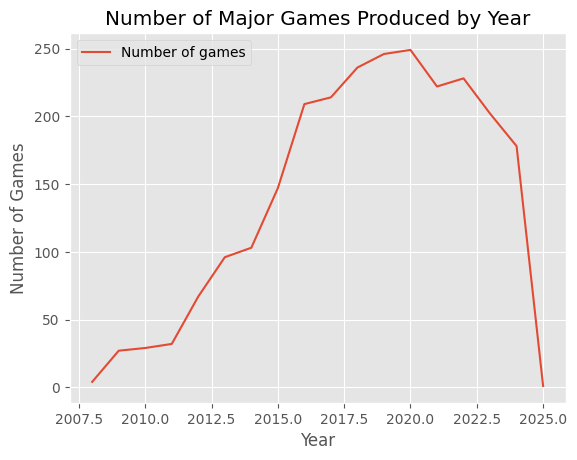

In [355]:
#create simple plot showing number of games/year
counts.plot()
plt.title("Number of Major Games Produced by Year")
plt.ylabel("Number of Games")
plt.show()

### Task 2.10: Yearly average

Compute the average rating per year for all major games.\
Use the numbers you computed to plot a line chart. Plot the year on x-axis and the average rating on y-axis.  

In [346]:
major_ratings = major_gamespd[["Year", "Rating"]]
major_ratings.head()

,Year,Rating
0,2014,4.70967
1,2021,4.54875
2,2019,4.74081
3,2014,4.60095
4,2012,4.75467


In [347]:
mean = major_ratings.groupby("Year").mean()#group by year and find means for each (leave year as index)
mean.rename(columns = {"Rating": "Mean Rating"},inplace = True) #rename 
mean.head(20)

,Mean Rating
Year,
2008,4.534145
2009,4.363289
2010,4.279736
2011,4.533581
2012,4.460494
2013,4.374461
2014,4.456612
2015,4.424987
2016,4.439052


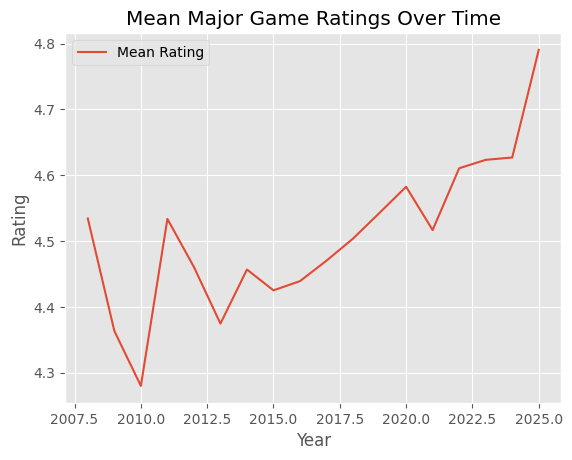

In [352]:
#plot trends in means over time
mean.plot()
plt.title("Mean Major Game Ratings Over Time")
plt.ylabel("Rating")
plt.show()

### Task 2.11: Explore and Interpret

Why is there so much spread (zig-zag) in the number of ratings in earlier years?

Is 250 ratings a good threshold for the title 'major' games? 

Continue to explore and use plots to inform your answer. Interesting measures to consider are the total number of ratings per year, the average number of ratings for a game in a particular year, etc. 

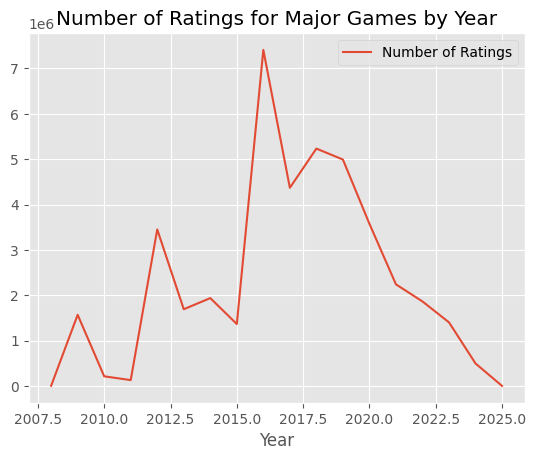

In [416]:
#ratings per year
ratings_per_yr = major_gamespd[['Year','Number of Ratings']]
ratings_grouped = ratings_per_yr.groupby('Year').sum()
ratings_grouped.plot()
plt.title("Number of Ratings for Major Games by Year")
plt.show()

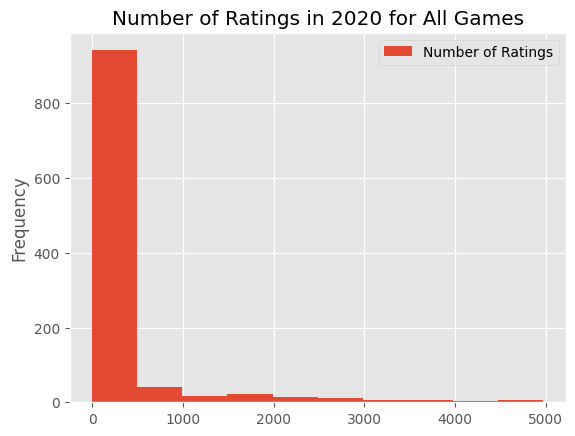

In [18]:
#look at spread of number of ratings in 2020 (where the dip is for mean ratings)
games20 = gamespd.loc[(gamespd["Year"]==2020) & (gamespd["Number of Ratings"] < 5000)] #looking at a smaller scare
game_ratings20 = games20[['Number of Ratings']]
game_ratings20.plot.hist()
plt.title("Number of Ratings in 2020 for All Games")
plt.show()

**Your interpretation**: While 250 ratings would have been a good threshold in the past, seeing the way the number of ratings is trending downward in the 2020's may indicate that the threshold needs to be adjusted when looking at later data. There are a substantial number of games that have less than 250 ratings, as shown in plot above looking at 2020 data, where things started to drop off.

## Task 3 Reflecting

Succinctly describe what you referenced to help you do the assignment and what the biggest challenges were.

Overall, I enjoyed this assignment. This all felt very applicable to me. It was interesting to see the breakdown in how efficient Pandas can be for handling dataframes when compared to base Python. While I had some experience with Pandas and knew it was easier to use, this made me appreciate quite a bit more. I think it was a little challenging using base python for some of the earlier questions knowing that there was a more straightfoward and less cumbersome way to do it in Pandas. It took me a bit to think of a good way to do 1.2.3 and hopefully that was sufficient. 
I thought the hints in the assignment and examples in lecture 6 were really helpful. I looked into some of the new functions (loc and idxmax, etc) a bit more through W3 and GeeksforGeeks.